# Solution 1 a.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
init=np.array([10,10]) 
mu=0
sigma=1/100.

In [25]:
def gd(init,rate):
    new_init=np.array([0,0])
    i=0
    final=[]
    diff=1
    while diff>0.001:
        new_init=init-rate*np.array([3*init[0]+init[1]+2,1/2*init[0]+(init[1]+2*init[1])+1])
        diff = np.linalg.norm(init-new_init)
        
        final.append(new_init.tolist())
        i=i+1
        init=new_init
            
    print"dradient descent converges to:",init
    print"with iterations:",i
    print"error:", diff
    global x1,y1
    x1,y1 = zip(*final)
    

In [26]:
gd(init,0.01)

dradient descent converges to: [-0.58192585 -0.30693963]
with iterations: 196
error: 0.000976030691286


In [27]:
def sgd(init,rate):
    new_init=np.array([0,0])
    i=0
    diff=1
    mu=0
    final2=[]
    sigma=1/10.
    while diff>0.001:
        new_init=init-rate*np.array([3*init[0]+init[1]+2+np.random.normal(mu,sigma),1/2*init[0]+(init[1]+2*init[1])+1+np.random.normal(mu,sigma)])
        diff = np.linalg.norm(init-new_init)
        
        final2.append(new_init.tolist())
        i=i+1
        init=new_init
            
    print"dradient descent converges to:",init
    print"with iterations:",i
    print"error:", diff
    global x2,y2
    x2,y2 = zip(*final2)
    
  


In [28]:
sgd(init,0.01)

dradient descent converges to: [-0.60353766 -0.25073131]
with iterations: 161
error: 0.000161222380537


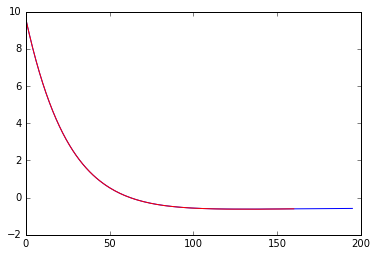

In [29]:
plt.plot(x1)
plt.plot(x2,color='r')
plt.show()

X axis in the graph above indicates the numbers of iteration, and y axis indicates the first value of vector x. As this shows that the red line (SGD) converges with less iterations than blue line (GD)

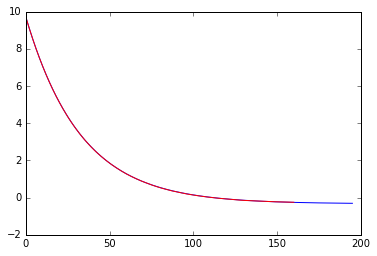

In [30]:
plt.plot(y1)
plt.plot(y2,color='r')
plt.show()

X axis in the graph above indicates the numbers of iteration, and y axis indicates the second value of vector x. As this shows that the red line (SGD) converges with less iterations than blue line (GD)

AS it turns out SGD converges faster than GD in my case

# Solution 1 b.

 Since our $\tilde{g}$ is a random varialble with probability $\frac{1}{4}$ equal to $\nabla (x_1\dot\beta-y_1)^2$, $\frac{1}{4}$ equal to $\nabla (x_2\dot\beta-y_2)^2$,$\frac{1}{4}$ equal to $\nabla (x_3\dot\beta-y_3)^2$,$\frac{1}{4}$ equal to $\nabla (x_4\dot\beta-y_4)^2$. The expected value of $\tilde{g}$ is simply $$E(\tilde{g})=\frac{1}{4}\nabla (x_1\dot\beta-y_1)^2+\frac{1}{4}\nabla (x_2\dot\beta-y_2)^2+\frac{1}{4}\nabla (x_3\dot\beta-y_3)^2+\frac{1}{4}\nabla (x_4\dot\beta-y_4)^2$$

# Solution 1 c.

In [31]:
X= np.random.randn(10000,100)
mu, sigma = 0, 0.01
w = np.random.normal(mu, sigma,10000)
xbetastar= X.sum(axis=1)
y =xbetastar+w
print y


[  8.96880097  21.34821651 -17.51687903 ...,   7.01255413   9.59566427
  -4.05929835]


In [32]:
betazero=np.ones(100)*10
list=[]
new_beta=[]

def sd2(betazero,rate):
    r=0
    diff=1. 
    while diff >0.01:
        for i in range(0,10000):
            
            list.append(2*(np.dot(X[i,:],betazero)-y[i])*X[i,:])
                 
        gradient=sum(list)/10000
        new_beta = betazero - rate*gradient
        diff = np.linalg.norm(new_beta-betazero)
        print diff 
        r=r+1
        betazero=new_beta
            
    print"Gradient descent converges to:"
    print betazero
    print"with iterations:",r
    print"error:", diff
   


In [37]:
sd2(betazero, 0.01)

Gradient descent converges to:
[ 0.27859738  0.19838693  0.28219479 -0.20927307  0.31709588  0.20347399
 -0.28856559 -0.095358   -0.23556997  0.15128392  0.27549953  0.0477942
  0.06215533 -0.30185809  0.15441497  0.31882459  0.1867418  -0.09258346
  0.27551224  0.15831848  0.26220502  0.49445459  0.40695671  0.26294808
 -0.21327345  0.31825092  0.18486082  0.02748404  0.00238851  0.26031228
  0.07741087 -0.35815593 -0.13055843  0.78017524 -0.13901866  0.06003523
  0.13668199  0.28149657 -0.33270236  0.24033161  0.04426071  0.16370873
  0.11408259  0.48338113  0.15933459 -0.04891995  0.40219342  0.22132114
  0.13237908 -0.14076927  0.01404412  0.0656597   0.07044117  0.38546262
 -0.5190497   0.08667537  0.29549721  0.41348427 -0.46509101 -0.14019395
  0.35105913  0.20098979  0.00203172 -0.63108085  0.34995168  0.44573458
 -0.07556117 -0.23265045 -0.06611787  0.23014064 -0.04694816 -0.12009909
 -0.0263082  -0.03146675  0.08552647  0.34291768  0.06151138 -0.09056035
  0.07842852 -0.28808

# Solution 1 d.

In [33]:
import random
yi = random.choice(y)
p =[i for i,r in enumerate(y) if r==yi]
xp= X[p][0]
print "Index of the random chosen value from Y:",p
print "The value vector y at index p:", yi
print "The vector corresponding to the same index from matrix X:" 
print xp


Index of the random chosen value from Y: [8050]
The value vector y at index p: -23.4784311291
The vector corresponding to the same index from matrix X:
[-0.97978658 -0.69769804 -0.99243813  0.73598302 -1.1151802  -0.7155885
  1.01484332  0.33536027  0.82846541 -0.53204359 -0.96889187 -0.16808527
 -0.21859127  1.06159111 -0.54305504 -1.12125985 -0.65674381  0.32560259
 -0.96893658 -0.55678314 -0.92213701 -1.73892509 -1.43120771 -0.92475025
  0.75005177 -1.11924233 -0.65012868 -0.09665738 -0.00840005 -0.91548055
 -0.27224282  1.25958245  0.45915507 -2.74376317  0.48890845 -0.21113519
 -0.48069072 -0.98998261  1.17006594 -0.84521141 -0.15565851 -0.57573987
 -0.40121194 -1.69998132 -0.56035665  0.17204438 -1.41445594 -0.77835436
 -0.46555803  0.4950651  -0.04939112 -0.23091565 -0.24773139 -1.35561613
  1.8254225  -0.30482469 -1.03922082 -1.45416419  1.63565763  0.4930418
 -1.23462404 -0.70685192 -0.00714526  2.2194198  -1.23072931 -1.56758387
  0.26573766  0.81819788  0.23252695 -0.8093712

Suppose that we initialize the $\beta_0$ as a vector of 100, 10s

In [34]:
betazero=np.ones(100)*10
init=np.zeros(100)

In [35]:
def sgd2(init,rate):
    i=0
    final=[]
    diff=1
    new_init=np.zeros(100)
    
    while diff>0.01:
        new_init = init-rate*2*(np.dot(xp,init)-yi)*xp
        diff = np.linalg.norm(init-new_init)
        i=i+1
        init=new_init
            
    print"Gradient descent converges to:"
    print init
    print"with iterations:",i
    print"error:", diff
   
   
   
  

In [36]:
sgd2(init,0.001)

Gradient descent converges to:
[ 0.2735965   0.19482584  0.27712933 -0.20551657  0.31140394  0.19982159
 -0.28338578 -0.09364631 -0.23134144  0.14856834  0.27055425  0.04693629
  0.06103963 -0.29643967  0.15164318  0.31310163  0.18338974 -0.09092156
  0.27056674  0.15547663  0.25749838  0.48557903  0.39965175  0.2582281
 -0.20944514  0.31253825  0.18154253  0.0269907   0.00234564  0.25563962
  0.07602133 -0.35172696 -0.12821488  0.76617093 -0.13652324  0.05895758
  0.13422852  0.27644365 -0.32673028  0.23601761  0.04346622  0.16077013
  0.11203479  0.47470434  0.1564745  -0.04804183  0.39497397  0.21734838
  0.13000285 -0.13824243  0.01379202  0.0644811   0.06917674  0.37854349
 -0.50973265  0.08511953  0.29019297  0.40606214 -0.45674253 -0.13767744
  0.34475755  0.19738198  0.00199525 -0.61975281  0.34366998  0.43773355
 -0.07420483 -0.22847432 -0.06493104  0.22600956 -0.04610543 -0.11794329
 -0.02583596 -0.03090192  0.08399125  0.33676223  0.06040724 -0.08893478
  0.07702071 -0.28291